### Excercise 12

In [2]:
import numpy as np
import matplotlib.pyplot as plt

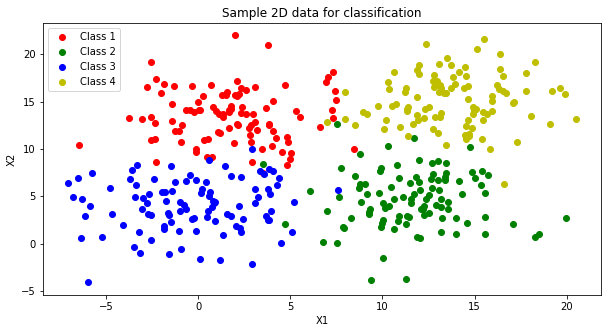

In [3]:
# Generate synthetic X/y data
mul1 = np.array([2,14])
mul2 = np.array([12,5])
mul3 = np.array([0,4])
mul4 = np.array([14,15])
sigma = np.array([[8,0],[0,8]])

X1 = np.random.multivariate_normal(mul1, sigma, 100)
X2 = np.random.multivariate_normal(mul2, sigma, 100)
X3 = np.random.multivariate_normal(mul3, sigma, 100)
X4 = np.random.multivariate_normal(mul4, sigma, 100)

plt.figure(figsize=(10, 5))
plt.plot(X1[:,0],X1[:,1],'ro', label='Class 1')
plt.plot(X2[:,0],X2[:,1],'go', label='Class 2')
plt.plot(X3[:,0],X3[:,1],'bo', label='Class 3')
plt.plot(X4[:,0],X4[:,1],'yo', label='Class 4')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [4]:
# Estimate means and covariances
mu_1 = X1.mean(axis=0)
mu_2 = X2.mean(axis=0)
mu_3 = X3.mean(axis=0)
mu_4 = X4.mean(axis=0)

cov_1 = np.cov(X1.T)
cov_2 = np.cov(X2.T)
cov_3 = np.cov(X3.T)
cov_4 = np.cov(X4.T)

p_y_1 = X1.shape[0]/(X1.shape[0]+X2.shape[0]+X3.shape[0]+X4.shape[0])
p_y_2 = X2.shape[0]/(X1.shape[0]+X2.shape[0]+X3.shape[0]+X4.shape[0])
p_y_3 = X3.shape[0]/(X1.shape[0]+X2.shape[0]+X3.shape[0]+X4.shape[0])
p_y_4 = X4.shape[0]/(X1.shape[0]+X2.shape[0]+X3.shape[0]+X4.shape[0])

In [5]:
means = np.array([mu_1,mu_2,mu_3,mu_4])
covs = np.array([cov_1,cov_2,cov_3,cov_4])
p_y_s = np.array([p_y_1,p_y_2,p_y_3,p_y_4])

In [6]:
X = np.concatenate((X1,X2,X3,X4),0)
y = np.concatenate((np.zeros((X1.shape[0],1)),np.ones((X2.shape[0],1)),np.full((X3.shape[0],1),2,np.float32),np.full((X4.shape[0],1),3,np.float32)),0)

def gauss_density(X,mu,sigma):
    k = X.shape[1]
    siginv = np.linalg.inv(sigma)
    d = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        x = X[i,:]
        d[i] = -0.5 * (x-mu) @ siginv @ (x-mu)
    return (2 * np.pi)**(-k/2) / np.sqrt(np.linalg.det(sigma)) * np.exp(d)

In [7]:
# Inference: p(Y=y|X=x) propto p(X=x|Y=y).p(Y=y)
def gda_infer(K,X,means,covs,p_y_s):
    p_ys = []
    norm = 0
    for i in range(K):
        p_x_y = gauss_density(X,means[i],covs[i])
        p_ys.append(p_x_y * p_y_s[i])
    for i in range(K):
        norm =  norm + p_ys[i]
    return p_ys, norm

In [8]:
p_ys, norm = gda_infer(4,X,means,covs,p_y_s)

In [10]:
p_y1 = p_ys[0]/norm
p_y2 = p_ys[1]/norm
p_y3 = p_ys[2]/norm
p_y4 = p_ys[3]/norm

In [11]:
# Finished!
train_acc = (np.concatenate((p_y1, p_y2, p_y3, p_y4), 1).argmax(axis=1)==y.reshape(-1)).sum() / X.shape[0]
print('Training accuracy: %f' % train_acc)

Training accuracy: 0.965000
